#### 1. 텍스트파일을 csv파일로 변환

import pandas as pd
import re

In [4]:
# read textfile
with open('2순위추천_김용인_1차.txt','r',encoding='utf-8') as file:
    lines = file.readlines()

In [5]:
# list
data = []
current_talker = None 

In [6]:
# save txt as dataframe
for line in lines:
    line = line.strip()
    #strip() 함수 : 문자열의 시작과 끝에서 공백을 제거한 후 반환한다. 만약, 괄호 안에 특정 값을 넣을 경우에는 해당하는 문자열을 제거할 수 있다.
    if line.startswith('코치') or line.startswith('코치이'): #코치, 코치이 시작하는 줄 찾기
        match = re.match(r'(\w+)\s(\d{2}:\d{2})', line)
        if match:
            talker,time = match.groups() #화자, 시간추출
            content= line[match.end():].strip() #내용추출
            current_talker = (talker,time)#화자와 시간저장
            data.append([talker,time,content])
        else:
            if current_talker:#계속 이어나가는경우
                talker,time = current_talker
                content= line.strip()
                if content:#빈줄이 아닌경우에만 추가
                    data.append([talker,time,content])

In [8]:
# dataframe
# list to df
df= pd.DataFrame(data,columns=['talker','time','content'])

In [10]:
# save as csv
df.to_csv('2순위추천_김용인_1차.csv',index=False,encoding='utf-8')
print('csv file saved')

csv file saved


이렇게 하니까, content가 들어가지 않는 문제가 생김. 
코치로 시작하는 줄에는 content가 없고, 그 밑에 있는데 설정을 잘못해서 그런것 같음

In [11]:
# 리스트 초기화
data = []
current_talker = None
current_time= None
current_content= []

In [13]:
for line in lines:
    line = line.strip()
    if line.startswith('코치') or line.startswith('코치이'):
        if current_talker:
            data.append([current_talker, current_time,''.join(current_content)])
        match= re.match(r'(\w+)\s(\d{2}:\d{2})', line)
        if match:
            talker,time = match.groups()
            current_talker= talker
            current_time = time
            current_content = [line[match.end():].strip()]
    else:
        if current_talker:
            current_content.append(line)
if current_talker:
    data.append([current_talker,current_time,''.join(current_content)])

In [14]:
print(data)

[['코치', '00:00', '시작했습니다. 그래요. 승현이 이제 입사한 지 2월, 3월, 4월 5월 이제 한 100일 넘었네.네 100일 좀 넘었죠.'], ['코치이', '00:13', '인턴 포함하면 그래도 한 8개월 8개월까지는'], ['코치', '00:22', '인턴 때 한 6주 했었지'], ['코치이', '00:26', '네 6조 인터넷에서'], ['코치', '00:28', '인턴 때 생활한 거랑 지금 한 100일 정도 생활해 보니 혹시 차이가 뭐야 어떤 게 뭐 이렇게 좀 특이할 만한 부분'], ['코치이', '00:38', '인턴 때는 이제 주로 좀 배움의 과정이었죠. 업무를 어떻게 하는지 그리고 어떤 업무를 하는지랑 이제 저희 직무가 어떤 일을 하는지 저희가 직접 뭔가 조사를 해보고 그거에 대해서 팀원분들한테 발표를 하는 그런 과정이 있었다면 이제는 좀 실무에 투입이 돼가지고 직접 사업장 분들이랑 커뮤니케이션도 하고 그런 게 일단 책임부터 좀 다른 것 같아요.제가 실수함으로 인해서 저희 팀의 업무에 지장이 갈 수도 있고 근데 이제 인턴 때는 아무래도 그런 책임에서는 조금 자유로웠는데 그런 부분이 좀 다른 것 같아요.'], ['코치', '01:14', '그렇지 어떻게 보면 인턴 때문에 좀 배웠던 게 많았다고 한다면 지금 현재 일하면서는 일하면서 뭔가 책임도 따르는 것도 있고 의무적으로 해야 될 것도 있고 확실히 다르긴 하지.그래서 인턴 때 많이 배웠던 부분들이 실제로 실무할 때 많이 도움이 되어야 되는데 그때 혹시 우리 인턴 때 했던 숙제들 중에 과제들 중에 실제 지금 실무하면서 도움이 됐던 분들이 어떤 부분일까?'], ['코치이', '01:45', '일단 지금 실무에 하는 게 주로 LCA 데이터 수집하고 이제 그 값들 소프트웨어 입력하고 이런 것들이다 보니까 인턴 때 했던 것 중에는 이제 LCA 실제 한 제품 대상으로 해가지고 직접 이제 진행을 해봤던 거 그게 가장 도움이 됐던 것 같아요.아무래도 LCA 업무다 보니까 직접적으로 연관 인턴 때 e

In [15]:
df = pd.DataFrame(data, columns=['talker','time','content'])

In [19]:
# save as csv
df.to_csv('2순위추천_김용인_1차.csv',index=False,encoding='utf-8')
print('csv file saved')

csv file saved


- 처음에는 시작하는지점부터 해서 , 밑에꺼는 없애서 content가 저장되지않음
- 두번쨰에는 current_talker를 추가해, 현재 말하고있는 화자가 바뀌지않았을경우, 현재 content에 계속 append()할수있게 만들었음
- 결과적으로 content컬럼에 다 맞게 들어감

#### 주제모델링

In [30]:
# 데이터 로드 및 전처리
df = pd.read_csv('2순위추천_김용인_1차.csv',encoding='utf-8')
print(df.head(3))

#head() : df 내용을 볼수있는 함수 ()안에는 보고싶은 숫자를 넣을수 있음

  talker   time                                            content
0     코치  00:00  시작했습니다. 그래요. 승현이 이제 입사한 지 2월, 3월, 4월 5월 이제 한 1...
1    코치이  00:13                           인턴 포함하면 그래도 한 8개월 8개월까지는
2     코치  00:22                                      인턴 때 한 6주 했었지


In [23]:
# 주제모델링
# lda를 사용하여 주제추출, 형태소 분석기를 사용하여 텍스트를 토큰화(konlpy)
# import
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [24]:
# 형태소 분석기 초기화
okt = Okt()

In [25]:
# 토큰화 함수 정의
def tokenize(text):
    tokens = okt.nouns(text)
    return ''.join(tokens)

In [26]:
# 텍스트 데이터 토큰화
df['tokens'] = df['content'].apply(tokenize)

In [31]:
#ko_stopwords도 읽어오기
stopwords_file_path = 'ko_stopwords.txt'
with open(stopwords_file_path, 'r', encoding='utf-8')as file:
    korean_stopwords = file.read().splitlines()

In [33]:
# 벡터화
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words=korean_stopwords)
X = vectorizer.fit_transform(df['content'])

/opt/anaconda3/envs/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가서', '같은', '것과', '결과에', '결론을', '관계가', '관련이', '그런', '그럼에도', '그렇게', '그에', '그치지', '김에', '까닭에', '낫다', '년도', '논하지', '누가', '다시', '달려', '대로', '대해', '되는', '되다', '되어', '들면', '들자면', '듯하다', '따르는', '따름이다', '따지지', '때가', '만은', '만이', '많은', '말하면', '말할것도', '몰라도', '몰랏다', '못하다', '미치다', '바꾸어서', '바꿔', '밖에', '방면으로', '보면', '보아', '부류의', '비길수', '비추어', '뿐만', '사람들', '상대적으로', '생각이다', '서술한바와같이', '쓰여', '아니다', '아니라', '안다', '안된다', '않고', '않기', '않는다면', '않다', '않다면', '않도록', '않으면', '알겠는가', '어쩔수', '없고', '없다', '예를', '외에', '요만한', '우에', '위에서', '이렇게', '이로', '이르다', '이와', '이유는', '인하여', '임에', '점에서', '정도에', '정도의', '종합한것과같이', '주저하지', '줄은', '지경이다', '틀림없다', '편이', '하고', '하기', '하기만', '하는', '하는것만', '하는것이', '하다', '하면', '하지', '한하다', '할수록', '함으로써', '해도', '해서는', '형식으로', '힘이'] not in stop_words.
  warnings.warn(


In [35]:
# lda model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [36]:
for index, topic in enumerate(lda.components_):
    print(f'Topic #{index}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic #0:
['있는', '제가', '보면', '지금', '보고', '업무를', '많이', '3년', '그런', '그렇죠']
Topic #1:
['10년', '이거', '공정도', '하고', '때는', '한번', '주임이', '보통', '저는', '이소리']
Topic #2:
['맞아요', '같아요', '인턴', '보면', '하고', '있고', '있는', '지금', '이렇게', '그런']
Topic #3:
['이렇게', '서울', '되고', '그나마', '되는데', '요즘에', '거야', '내가', '맞아요', '그렇죠']
Topic #4:
['것도', '먼저', '많이', '지금', '내가', '하고', '있을', '이렇게', '근데', '그런']


In [37]:
# 주제 분포 추출
topic_distribution = lda.transform(X)

In [38]:
# 각 대화의 주요 주제 할당
df['topic'] = topic_distribution.argmax(axis=1)

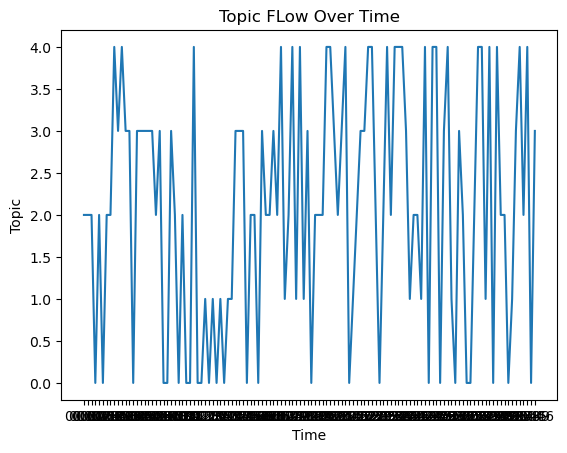

In [41]:
# 시각화
import matplotlib.pyplot as plt
plt.plot(df['time'], df['topic'])
plt.xlabel('Time')
plt.ylabel('Topic')
plt.title('Topic FLow Over Time')
plt.show()

*위에서 사용한 코드들의 함수정리*
- pd.read_csv() : csv 파일 읽어서 df로 변환함
- tokenize(text) : 텍스트 형태소를 분석하여 명사만 추출한 후, 공백으로 연결된 문자열로 반환
- apply(tokenize) : 각 행에 함수적용시킴
- open(stopwords_file_path,'r',encoding='utf-8') : 읽기모드로 열어, 한국어로 인코딩
- CountVectorizer() : 텍스트 데이터를 벡터화 + max_df=0.9: 전체 문서의 90% 이상에 등장하는 단어는 무시합니다.
	min_df=2: 최소 두 문서에 등장하는 단어만 사용합니다.
	stop_words=korean_stopwords: 한국어 불용어 리스트를 사용하여 불용어를 제거합니다.


*위에 코드의 문제점*
- 일단 vectorizer가 최소 두문서에 등장하는 단어만 사용한다고 하는데, 그럼 난 문서가 한개뿐인데 무얼 비교해서 가지고 온것인가?
- stopwords에 불용어가 더 필요한듯 해 보인다. 주제가 너무 이상해!
- 주제는 5개는 너무 많고, 3개정도가 적당한듯
- 주제가 코치꺼 코치이꺼 해서 어디에 포함되는지 볼수있나?

*문제점의 해결방법*
- 문서가 하나뿐이여도 텍스트를 여러개의 작은 문서로 나누어 주제 모델링을 할 수 있다. 
- 주제의 수를 결정하는 n_components 파라미터를 사용하여 주제수 조정


/opt/anaconda3/envs/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가서', '같은', '것과', '결과에', '결론을', '관계가', '관련이', '그런', '그럼에도', '그렇게', '그에', '그치지', '김에', '까닭에', '낫다', '년도', '논하지', '누가', '다시', '달려', '대로', '대해', '되는', '되다', '되어', '들면', '들자면', '듯하다', '따르는', '따름이다', '따지지', '때가', '만은', '만이', '많은', '말하면', '말할것도', '몰라도', '몰랏다', '못하다', '미치다', '바꾸어서', '바꿔', '밖에', '방면으로', '보면', '보아', '부류의', '비길수', '비추어', '뿐만', '사람들', '상대적으로', '생각이다', '서술한바와같이', '쓰여', '아니다', '아니라', '안다', '안된다', '않고', '않기', '않는다면', '않다', '않다면', '않도록', '않으면', '알겠는가', '어쩔수', '없고', '없다', '예를', '외에', '요만한', '우에', '위에서', '이렇게', '이로', '이르다', '이와', '이유는', '인하여', '임에', '점에서', '정도에', '정도의', '종합한것과같이', '주저하지', '줄은', '지경이다', '틀림없다', '편이', '하고', '하기', '하기만', '하는', '하는것만', '하는것이', '하다', '하면', '하지', '한하다', '할수록', '함으로써', '해도', '해서는', '형식으로', '힘이'] not in stop_words.
  warnings.warn(
/var/folders/8x/sgw8

Topic #0:
['한번', '생각', '이소리', '회사', '주임', '부분', '업무', '사람', '지금', '얘기']
Topic #1:
['어제', '요즘', '회사', '김포', '출퇴근', '관점', '부분', '업무', '먼저', '보고']
Topic #2:
['관련', '수석', '질의', '인사', '주임', '업무', '부분', '인턴', '지금', '퇴근']
코치의 주제 분포:
0    0.483871
2    0.258065
1    0.258065
Name: topic, dtype: float64

코치이의 주제 분포:
0    0.517241
1    0.258621
2    0.224138
Name: topic, dtype: float64


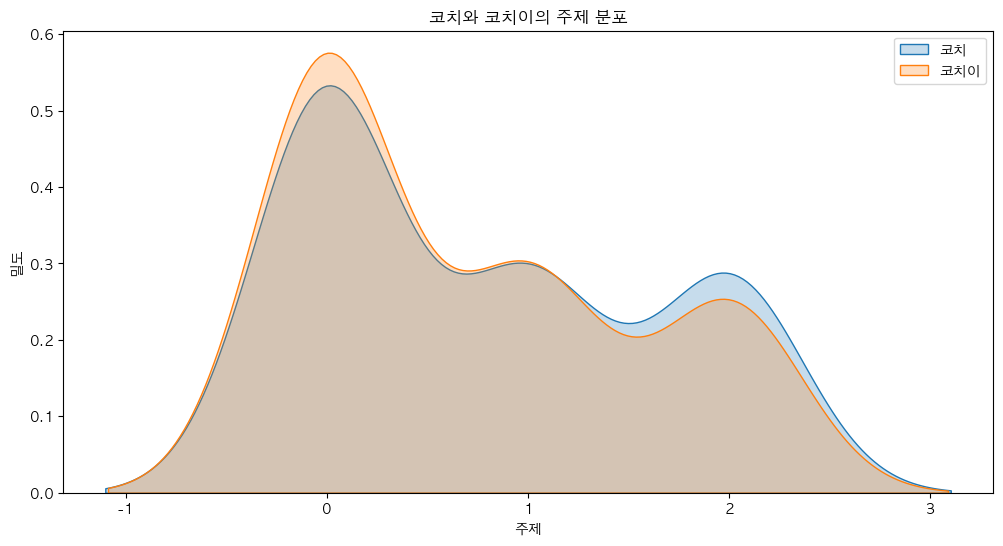

In [50]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 로드
df = pd.read_csv('2순위추천_김용인_1차.csv', encoding='utf-8')

# 형태소 분석기 초기화
okt = Okt()

# 텍스트 토큰화 함수 정의
def tokenize(text):
    tokens = okt.nouns(text)
    return ' '.join(tokens)

# 텍스트 데이터 토큰화
df['tokens'] = df['content'].apply(tokenize)

# 불용어 파일 경로
stopwords_file_path = 'ko_stopwords.txt'

# 불용어 파일 읽기
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    korean_stopwords = file.read().splitlines()

# CountVectorizer를 사용하여 텍스트 데이터를 벡터화
vectorizer = CountVectorizer(max_df=0.9, min_df=1, stop_words=korean_stopwords)
X = vectorizer.fit_transform(df['tokens'])

# LDA 모델 생성 및 훈련
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# 주제 출력
for index, topic in enumerate(lda.components_):
    print(f'Topic #{index}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

# 각 문서(발화)에 대한 주제 분포 추출
topic_distribution = lda.transform(X)

# 각 발화의 주요 주제 할당
df['topic'] = topic_distribution.argmax(axis=1)

# 코치와 코치이의 주제 분포 계산
coach_topics = df[df['talker'] == '코치']['topic'].value_counts(normalize=True)
coachee_topics = df[df['talker'] == '코치이']['topic'].value_counts(normalize=True)

# 결과 출력
print("코치의 주제 분포:")
print(coach_topics)

print("\n코치이의 주제 분포:")
print(coachee_topics)

# 코치와 코치이의 주제 분포 계산
df['talker_topic'] = df['talker'] + ' - Topic ' + df['topic'].astype(str)

# KDE 그래프 시각화
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['talker'] == '코치']['topic'], label='코치', shade=True)
sns.kdeplot(df[df['talker'] == '코치이']['topic'], label='코치이', shade=True)
plt.xlabel('주제')
plt.ylabel('밀도')
plt.title('코치와 코치이의 주제 분포')
plt.legend()
plt.show()

In [ ]:
#한글 왜 안나와*
#from matplotlib import rc
#rc('font', family='AppleGothic')m
#plt.rcParams['axes.unicode_minus'] = False
#저런 코드가 필요함ㅇㅇ

*바로 위 코드로 알게된점, 바꿀점*
- 주제 자체를 3개로 바꾼건 잘한듯, 여전히 주제가 엄청 잘 나오고 있지는 않음
- 2:6:2 비율로 전반 중반 후반을 나누어서 봐볼것
- 주제 자체는 비슷한 비율로 서로 이야기하고있는듯하다